<a href="https://colab.research.google.com/github/KomalT2003/SignalProcessing/blob/main/ApplicationOfConvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import soundfile as sf

# Define the kernel as a NumPy array with the appropriate data type (float)
kernel = np.array([-0.0003, 0.0000, 0.0003, 0.0005, 0.0006, 0.0005, 0.0002, -0.0003, -0.0008, -0.0011, -0.0012, -0.0008, 0.0000, 0.0010, 0.0019, 0.0024, 0.0020, 0.0008, -0.0009, -0.0028, -0.0040, -0.0041, -0.0027, 0.0000, 0.0033, 0.0060, 0.0072, 0.0060, 0.0025, -0.0027, -0.0079, -0.0113, -0.0114, -0.0074, 0.0000, 0.0089, 0.0165, 0.0197, 0.0167, 0.0069, -0.0077, -0.0233, -0.0347, -0.0367, -0.0255, 0.0000, 0.0375, 0.0817, 0.1252, 0.1599, 0.1791, 0.1791, 0.1599, 0.1252, 0.0817, 0.0375, 0.0000, -0.0255, -0.0367, -0.0347, -0.0233, -0.0077, 0.0069, 0.0167, 0.0197, 0.0165, 0.0089, 0.0000, -0.0074, -0.0114, -0.0113, -0.0079, -0.0027, 0.0025, 0.0060, 0.0072, 0.0060, 0.0033, 0.0000, -0.0027, -0.0041, -0.0040, -0.0028, -0.0009, 0.0008, 0.0020, 0.0024, 0.0019, 0.0010, 0.0000, -0.0008, -0.0012, -0.0011, -0.0008, -0.0003, 0.0002, 0.0005, 0.0006, 0.0005, 0.0003, 0.0000, -0.0003], dtype=float)

def customConvolve(signal, kernel):
    signal_len = len(signal)
    kernel_len = len(kernel)
    output = np.zeros(signal_len)

    for i in range(signal_len):
        for j in range(kernel_len):
            if i - j >= 0:
                output[i] += signal[i - j] * kernel[j]

    return output

# Load input audio
input_audio, sample_rate = sf.read('hello.wav')

# Extract the audio data from the loaded sequence of tuples
input_audio_data = input_audio[:, 0]  # Assuming mono audio

# Ensure the kernel and input audio have the same length
if len(input_audio_data) < len(kernel):
    raise ValueError("Input audio is shorter than the kernel.")

# Convolve the input audio data with the kernel
denoised_audio = customConvolve(input_audio_data, kernel)

# Normalize the denoised audio
denoised_audio = denoised_audio / np.max(np.abs(denoised_audio))

# Save the denoised audio to a file
sf.write('denoised_hello.wav', denoised_audio, sample_rate)

print("Denoising completed and saved to 'denoised_hello.wav'")



Denoising completed and saved to 'denoised_hello.wav'


In [ ]:
import soundfile as sf
audio_data,sample_rate=sf.read('testhello.wav')
print(audio_data)

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 ...
 [-0.00756836 -0.00756836]
 [-0.00744629 -0.00744629]
 [-0.0071106  -0.0071106 ]]


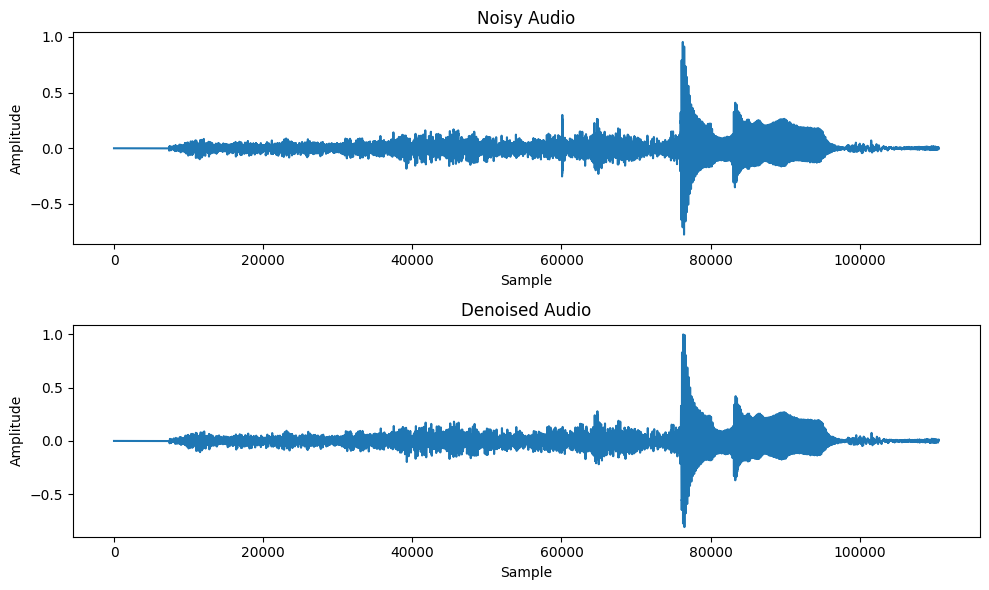

Denoising completed and saved to 'helloDenoised.wav'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Your kernel and custom_convolve function
kernel = np.array(
    [-0.0003, 0.0000, 0.0003, 0.0005, 0.0006, 0.0005, 0.0002, -0.0003, -0.0008, -0.0011, -0.0012, -0.0008, 0.0000,
     0.0010, 0.0019, 0.0024, 0.0020, 0.0008, -0.0009, -0.0028, -0.0040, -0.0041, -0.0027, 0.0000, 0.0033, 0.0060,
     0.0072, 0.0060, 0.0025, -0.0027, -0.0079, -0.0113, -0.0114, -0.0074, 0.0000, 0.0089, 0.0165, 0.0197, 0.0167,
     0.0069, -0.0077, -0.0233, -0.0347, -0.0367, -0.0255, 0.0000, 0.0375, 0.0817, 0.1252, 0.1599, 0.1791, 0.1791,
     0.1599, 0.1252, 0.0817, 0.0375, 0.0000, -0.0255, -0.0367, -0.0347, -0.0233, -0.0077, 0.0069, 0.0167, 0.0197,
     0.0165, 0.0089, 0.0000, -0.0074, -0.0114, -0.0113, -0.0079, -0.0027, 0.0025, 0.0060, 0.0072, 0.0060, 0.0033,
     0.0000, -0.0027, -0.0041, -0.0040, -0.0028, -0.0009, 0.0008, 0.0020, 0.0024, 0.0019, 0.0010, 0.0000, -0.0008,
     -0.0012, -0.0011, -0.0008, -0.0003, 0.0002, 0.0005, 0.0006, 0.0005, 0.0003, 0.0000, -0.0003])

def custom_convolve(signal, kernel=kernel):
    signal_len = len(signal)
    kernel_len = len(kernel)
    output = np.zeros(signal_len)
    for i in range(signal_len):
        for j in range(kernel_len):
            if i - j >= 0:
                output[i] += signal[i - j] * kernel[j]
    return output

# Read the input audio and ensure it's mono
input_audio, sample_rate = sf.read('testhello.wav')

if len(input_audio.shape) > 1:
    input_audio = np.mean(input_audio, axis=1)

denoised_audio = custom_convolve(input_audio, kernel)

# Normalize the denoised audio
denoised_audio = denoised_audio / np.max(np.abs(denoised_audio))

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Noisy Audio")
plt.plot(input_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.title("Denoised Audio")
plt.plot(denoised_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Save the denoised audio
sf.write('helloDenoised.wav', denoised_audio, sample_rate)
print("Denoising completed and saved to 'helloDenoised.wav'")